<a href="https://colab.research.google.com/github/radhikasethi2011/Hinglish/blob/data_exploration/HinglishNLP_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


CleanClassFiles = json files 


In [ ]:
%cd gdrive/MyDrive/CleanClassFiles/

[Errno 2] No such file or directory: 'gdrive/MyDrive/CleanClassFiles/'
/content/gdrive/.shortcut-targets-by-id/1kflTZxz-K5cknoobfxj0Z1WH1ppfbXhM/CleanClassFiles


In [ ]:
%ls


final_test.json  test.json  train.json  valid.json


In [ ]:
from pathlib import Path 
p = Path('.')
allFiles = []
for json_file in p.iterdir():
  allFiles.append(json_file)


In [ ]:
print(allFiles)

[PosixPath('valid.json'), PosixPath('test.json'), PosixPath('train.json'), PosixPath('final_test.json')]


In [ ]:
result.clear()

In [ ]:
import json
result = [] 
for json_file in allFiles:
  input_file = open(json_file,'r')
  f = open(json_file)
  decoded_text = json.load(f)
  for item in decoded_text:
    text_data = item.get('clean_text')
    print(text_data)
    result.append(text_data)


Streaming output truncated to the last 5000 lines.
Ye kuchh ulta sidha bolanewalo ka jara bhi dhyan nahi dena chahiye ye sirf samy barbad karate hai inlogo ko des ya …  // t . co / lsEH1GKE5i  
 _ Sena iss so-called unguided youth ko 1 moth ke lie jail mein daalo phir sab apne aap line peaa gye ge :pouting_face::pouting_face::pouting_face:  
Very nice too good . Agar aap acche Hain Log Aap Ke Saath Hamesha rahenge  // t . co / QdO931vxdl  
Hamare manniye Pradhan mantri Shree narendra modi ji ko bhavya jeet ki hardik subhkamnaye :folded_hands::folded_hands::folded_hands: jai Shree ram :folded_hands::folded_hands::folded_hands:  // t . co / lDwkQD2hV7  
 ki munafiqat dekhein .  ne jab mulk lootne waloon ke khalaf tweet ki to bhi ne itna ghussa ki …  // t . co / 0SKkxxy6xb  
 Google ko galat question mat diya karo godi media puchta toh pata chalta na Ghonchu :face_with_tears_of_joy::face_with_tears_of_joy::face_with_tears_of_joy:  // t co / Kck0bz28Eg  
Salute to # SarfrazAhmed for giving

In [ ]:
with open('/content/gdrive/MyDrive/DataExploration/json_clean_text.txt', 'w') as outfile:
  outfile.write("Text\n")
  for r in result:
    outfile.write("%s\n" % r)

cleaning json_clean_text.txt data 

In [ ]:
import pandas as pd 
import re
df = pd.read_csv('/content/gdrive/MyDrive/DataExploration/json_clean_text.txt')

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [ ]:
df.head()

,Text
0,modi mantrimandal may samil honay par badhai narmaday har
1,_ Rashid Tu toh naamakool hai Mare h … // t . co / P003zxqUtP
2,U saw caste and religion in them ... nation saw talent and trust in them !! .. problem is tum paida hi ulte hue the !!
3,sir local police station pe complaint krne par bi sunwai nhi hai .. mene 5 may 2019 Ko complaint karwai … // t . co / YUFZvNNfUz
4,Ve Maahi song from # Kesari is current favourite ! # Music # Melody # ArijitSingh you are becoming my favouri … // t co / FYouCHfEIH


In [ ]:
def clean(df, col):
    """Cleaning Twiitter data
    Arguments:
        df {[pandas dataframe]} -- Dataset that needs to be cleaned
        col {[string]} -- column in which text is present
    Returns:
        [pandas dataframe] -- Datframe with a "clean_text" column
    """
    df["clean_text"] = df[col]
    df["clean_text"] = (
        (df["clean_text"])
        .apply(lambda text: re.sub(r"RT\s@\w+:", "Retweet", text))  # Removes RTS
        .apply(lambda text: re.sub(r"@", "mention ", text))  # Replaces @ with mention
        .apply(lambda text: re.sub(r"#", "hashtag ", text))  # Replaces # with hastag
        .apply(lambda text: re.sub(r"http\S+", "", text))  # Removes URL
        .apply(lambda text: re.sub(r'// .*$', ":", text)
        
    )
    return df

df1 = clean(df, "Text")

In [ ]:
df1.head()

,Text,clean_text
0,modi mantrimandal may samil honay par badhai narmaday har,modi mantrimandal may samil honay par badhai narmaday har
1,_ Rashid Tu toh naamakool hai Mare h … // t . co / P003zxqUtP,_ Rashid Tu toh naamakool hai Mare h … :
2,U saw caste and religion in them ... nation saw talent and trust in them !! .. problem is tum paida hi ulte hue the !!,U saw caste and religion in them ... nation saw talent and trust in them !! .. problem is tum paida hi ulte hue the !!
3,sir local police station pe complaint krne par bi sunwai nhi hai .. mene 5 may 2019 Ko complaint karwai … // t . co / YUFZvNNfUz,sir local police station pe complaint krne par bi sunwai nhi hai .. mene 5 may 2019 Ko complaint karwai … :
4,Ve Maahi song from # Kesari is current favourite ! # Music # Melody # ArijitSingh you are becoming my favouri … // t co / FYouCHfEIH,Ve Maahi song from hashtag Kesari is current favourite ! hashtag Music hashtag Melody hashtag ArijitSingh you are becoming my favouri … :


Saving clean json text as jclean_text.txt

In [ ]:
import numpy as np

np.savetxt(r'/content/gdrive/MyDrive/DataExploration/jclean_text.txt', df1['clean_text'].values, fmt='%s')

concatinating jclean_text.txt with 3 text files in CleanLMFiles
1. concat CleanLM Files 
2. Concat giga_CleanLM File with cleaned_json.txt

In [ ]:
%cd /content/gdrive/MyDrive/CleanLMFiles/

/content/gdrive/.shortcut-targets-by-id/1_1k6v6YE4YVKpy3AjvdiPc9MbOMh8j-7/CleanLMFiles


In [ ]:
p = Path('.')
allFiles = []
for text_file in p.iterdir():
  allFiles.append(text_file)


In [ ]:
print(allFiles)

[PosixPath('train_lm.txt'), PosixPath('test_lm.txt'), PosixPath('dev_lm.txt')]


In [ ]:
with open('/content/gdrive/MyDrive/DataExploration/giga_text.txt', 'w') as outfile:
  outfile.write("Text\n")
  for f in allFiles:
    with open(f) as infile:
      contents = infile.read()
      outfile.write(contents)

In [ ]:
#2
%cd /content/gdrive/MyDrive/DataExploration/

p = Path('.')
allFiles = []
for text_file in p.iterdir():
  if not text_file.is_dir():
    allFiles.append(text_file)

print(allFiles)

/content/gdrive/.shortcut-targets-by-id/1NVhmWD7fwk0NegBBjMwban2Z73yYT-Av/DataExploration
[PosixPath('jclean_text.txt'), PosixPath('giga_text.txt')]


In [ ]:
with open('/content/gdrive/MyDrive/DataExploration/MegaTextDoc.txt', 'w') as outfile:
  outfile.write("Text\n")
  for f in allFiles:
    with open(f) as infile:
      contents = infile.read()
      outfile.write(contents)

mega file done. 
Data exploration! 

list of stop words from [HinglishNLP](https://github.com/TrigonaMinima/HinglishNLP/blob/master/data/assets/stop_hinglish)

In [5]:
%cd /content/gdrive/MyDrive/DataExploration/
stopwords = []
text_file = open('stopwords-hinglish.txt', 'r')
stopwords = [line.split("\n")[0] for line in text_file.readlines()]

/content/gdrive/.shortcut-targets-by-id/1NVhmWD7fwk0NegBBjMwban2Z73yYT-Av/DataExploration


In [6]:
stopwords #stopwords list from hinglish-stopwords file

['a',
 'aadi',
 'aaj',
 'aap',
 'aapne',
 'aata',
 'aati',
 'aaya',
 'aaye',
 'ab',
 'abbe',
 'abbey',
 'abe',
 'abhi',
 'able',
 'about',
 'above',
 'accha',
 'according',
 'accordingly',
 'acha',
 'achcha',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 'agar',
 'ain',
 'aint',
 "ain't",
 'aisa',
 'aise',
 'aisi',
 'alag',
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'andar',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'ap',
 'apan',
 'apart',
 'apna',
 'apnaa',
 'apne',
 'apni',
 'appear',
 'are',
 'aren',
 'arent',
 "aren't",
 'around',
 'arre',
 'as',
 'aside',
 'ask',
 'asking',
 'at',
 'aur',
 'avum',
 'aya',
 'aye',
 'baad',
 'baar',
 'bad',
 'bahut',
 'bana',
 'banae',
 'banai',
 'banao',
 'banaya',
 'banaye',
 'banayi',
 'banda',
 'bande',
 'bandi',
 'bane',
 'bani',
 'bas',
 'bata',
 'bat

In [10]:
%cd /content/gdrive/MyDrive/DataExploration/mega_text/

/content/gdrive/.shortcut-targets-by-id/1NVhmWD7fwk0NegBBjMwban2Z73yYT-Av/DataExploration/mega_text


In [52]:
import pandas as pd
df = pd.read_csv('MegaTextDoc.txt', sep='delimiter')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [53]:
df.head()

,Text
0,modi mantrimandal may samil honay par badhai n...
1,_ Rashid Tu toh naamakool hai Mare h … :
2,U saw caste and religion in them ... nation sa...
3,sir local police station pe complaint krne par...
4,Ve Maahi song from hashtag Kesari is current ...


In [54]:
#everything in lowertext 
df['Text'] = df['Text'].str.lower()

In [55]:
df.head()

,Text
0,modi mantrimandal may samil honay par badhai n...
1,_ rashid tu toh naamakool hai mare h … :
2,u saw caste and religion in them ... nation sa...
3,sir local police station pe complaint krne par...
4,ve maahi song from hashtag kesari is current ...


Number of chars per tweet

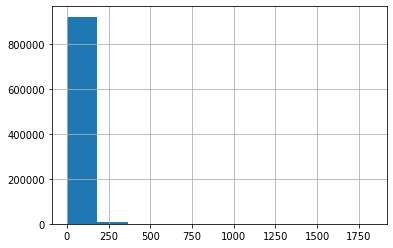

In [56]:
df['Text'].str.len().hist()

In [57]:
stop = set(stopwords) #set of the hinglish stopwords 

In [58]:
stop

{'hasn',
 'kuchh',
 'ho',
 'inner',
 'hua',
 'tumhari',
 'rakhe',
 'via',
 'kinko',
 'waise',
 'inse',
 'it',
 'hello',
 'phla',
 'they',
 'dijiye',
 'isn',
 'until',
 'baar',
 'karta',
 't',
 'bolta',
 'puri',
 'aisa',
 'wahan',
 'ltd',
 'moreover',
 'th',
 'sakte',
 'vahaan',
 'yaha',
 'liya',
 'eg',
 'rakhi',
 'sabhi',
 'still',
 'sensible',
 'them',
 'therefore',
 'i',
 'mainly',
 'aata',
 "hasn't",
 'one',
 'namely',
 'apnaa',
 'across',
 'should',
 'karunga',
 'waali',
 'were',
 'someone',
 "i'm",
 'took',
 'quite',
 'certain',
 'kayi',
 'looks',
 'kitne',
 'kinke',
 'jaisi',
 'overall',
 'unless',
 'di',
 'kuch',
 'mujhe',
 'enough',
 'werent',
 'whenever',
 "they're",
 'rhi',
 'vaala',
 'goes',
 'jiska',
 'o',
 'jitna',
 'was',
 "i'll",
 'causes',
 'karega',
 'too',
 'ya',
 'beside',
 'ussi',
 'could',
 'hone',
 'the',
 'bani',
 'aaj',
 'lagti',
 'various',
 'theirs',
 'isne',
 'gets',
 'waale',
 'kaise',
 'doesnt',
 'bro',
 'keep',
 'like',
 'vaisa',
 'within',
 'appear',
 'ch

In [59]:
stop.update(['Retweet','retweet','mention',':','.','...','....', '//','-','/','!','?','hashtag', '_','…','""'])

In [60]:
stop

{'hasn',
 'kuchh',
 'ho',
 'inner',
 'hua',
 'tumhari',
 'rakhe',
 'via',
 'kinko',
 'waise',
 'inse',
 'it',
 'hello',
 'phla',
 'they',
 'dijiye',
 'isn',
 'until',
 'baar',
 'karta',
 't',
 'bolta',
 'puri',
 'aisa',
 'wahan',
 'ltd',
 'moreover',
 'th',
 'sakte',
 'vahaan',
 'yaha',
 'liya',
 'eg',
 'rakhi',
 'sabhi',
 'still',
 'sensible',
 'them',
 'therefore',
 'i',
 'mainly',
 'aata',
 "hasn't",
 'one',
 'namely',
 'apnaa',
 'across',
 'should',
 'karunga',
 'waali',
 'were',
 'someone',
 "i'm",
 'took',
 'quite',
 'certain',
 'kayi',
 'looks',
 'kitne',
 '/',
 'kinke',
 'jaisi',
 'overall',
 'unless',
 'di',
 'kuch',
 'mujhe',
 'enough',
 'werent',
 'whenever',
 "they're",
 'rhi',
 'vaala',
 'goes',
 'jiska',
 'o',
 'jitna',
 'was',
 "i'll",
 'causes',
 'karega',
 'too',
 'ya',
 'beside',
 'ussi',
 'could',
 'hone',
 'the',
 'bani',
 'aaj',
 'lagti',
 'various',
 'theirs',
 'isne',
 'gets',
 'waale',
 'kaise',
 'doesnt',
 'bro',
 'keep',
 'like',
 'vaisa',
 'within',
 'appear'

In [61]:
df['Text'].isnull().sum()

5

In [62]:
df.count()

Text    933520
dtype: int64

In [63]:
df.dropna(inplace=True)

In [64]:
#creating corpus 
corpus1 = []
new= df['Text'].str.split()
new=new.values.tolist()
corpus1=[word for i in new for word in i]

#dictionary of stop words
from collections import defaultdict
dic=defaultdict(int)
for word in corpus1:
    if word in stop:
        dic[word]+=1

In [65]:
new #list of lists of data

[['modi',
  'mantrimandal',
  'may',
  'samil',
  'honay',
  'par',
  'badhai',
  'narmaday',
  'har'],
 ['_', 'rashid', 'tu', 'toh', 'naamakool', 'hai', 'mare', 'h', '…', ':'],
 ['u',
  'saw',
  'caste',
  'and',
  'religion',
  'in',
  'them',
  '...',
  'nation',
  'saw',
  'talent',
  'and',
  'trust',
  'in',
  'them',
  '!!',
  '..',
  'problem',
  'is',
  'tum',
  'paida',
  'hi',
  'ulte',
  'hue',
  'the',
  '!!'],
 ['sir',
  'local',
  'police',
  'station',
  'pe',
  'complaint',
  'krne',
  'par',
  'bi',
  'sunwai',
  'nhi',
  'hai',
  '..',
  'mene',
  '5',
  'may',
  '2019',
  'ko',
  'complaint',
  'karwai',
  '…',
  ':'],
 ['ve',
  'maahi',
  'song',
  'from',
  'hashtag',
  'kesari',
  'is',
  'current',
  'favourite',
  '!',
  'hashtag',
  'music',
  'hashtag',
  'melody',
  'hashtag',
  'arijitsingh',
  'you',
  'are',
  'becoming',
  'my',
  'favouri',
  '…',
  ':'],
 ['the',
  'only',
  'one',
  'boy',
  'that',
  'matters',
  'uhh',
  'i',
  'love',
  'him',
  'a

In [66]:
print(len(stop))
print(len(corpus))
print(len(dic))

1052
933520
990


In [67]:
corpus1

['modi',
 'mantrimandal',
 'may',
 'samil',
 'honay',
 'par',
 'badhai',
 'narmaday',
 'har',
 '_',
 'rashid',
 'tu',
 'toh',
 'naamakool',
 'hai',
 'mare',
 'h',
 '…',
 ':',
 'u',
 'saw',
 'caste',
 'and',
 'religion',
 'in',
 'them',
 '...',
 'nation',
 'saw',
 'talent',
 'and',
 'trust',
 'in',
 'them',
 '!!',
 '..',
 'problem',
 'is',
 'tum',
 'paida',
 'hi',
 'ulte',
 'hue',
 'the',
 '!!',
 'sir',
 'local',
 'police',
 'station',
 'pe',
 'complaint',
 'krne',
 'par',
 'bi',
 'sunwai',
 'nhi',
 'hai',
 '..',
 'mene',
 '5',
 'may',
 '2019',
 'ko',
 'complaint',
 'karwai',
 '…',
 ':',
 've',
 'maahi',
 'song',
 'from',
 'hashtag',
 'kesari',
 'is',
 'current',
 'favourite',
 '!',
 'hashtag',
 'music',
 'hashtag',
 'melody',
 'hashtag',
 'arijitsingh',
 'you',
 'are',
 'becoming',
 'my',
 'favouri',
 '…',
 ':',
 'the',
 'only',
 'one',
 'boy',
 'that',
 'matters',
 'uhh',
 'i',
 'love',
 'him',
 'a',
 'lot',
 '(((',
 'sarwatjee',
 'wednesday',
 'ke',
 'muqabil',
 'ki',
 'opening',
 's

In [68]:
dic

defaultdict(int,
            {'!': 6304,
             '""': 13487,
             '-': 9727,
             '.': 35024,
             '...': 8381,
             '....': 2972,
             '/': 15437,
             '//': 14825,
             ':': 19094,
             '?': 8466,
             '_': 15542,
             'a': 15805,
             'aadi': 123,
             'aaj': 12070,
             'aap': 19365,
             'aapne': 1715,
             'aata': 2551,
             'aati': 1909,
             'aaya': 2389,
             'aaye': 1921,
             'ab': 20910,
             'abbe': 60,
             'abbey': 61,
             'abe': 1907,
             'abhi': 7975,
             'able': 59,
             'about': 934,
             'above': 43,
             'accha': 1545,
             'according': 156,
             'acha': 4224,
             'achcha': 427,
             'across': 17,
             'actually': 283,
             'after': 534,
             'again': 836,
             'against': 727,
   

Plot of the most common stopwords in the data 

<BarContainer object of 10 artists>

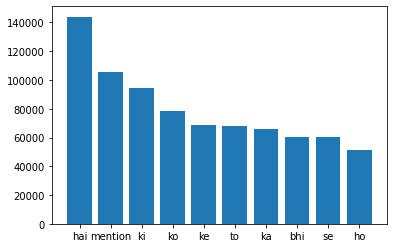

In [69]:
import matplotlib.pyplot as plt
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)


finding words other than stopwords that occur frequently in the hinglish data 

In [72]:
import seaborn as sns
from collections import Counter
counter=Counter(corpus1)
most=counter.most_common()



In [73]:
counter

Counter({'modi': 9230,
         'mantrimandal': 11,
         'may': 2232,
         'samil': 55,
         'honay': 288,
         'par': 13887,
         'badhai': 1012,
         'narmaday': 4,
         'har': 7957,
         '_': 15542,
         'rashid': 186,
         'tu': 20832,
         'toh': 19845,
         'naamakool': 5,
         'hai': 144016,
         'mare': 341,
         'h': 24088,
         '…': 34349,
         ':': 19094,
         'u': 6732,
         'saw': 253,
         'caste': 121,
         'and': 11173,
         'religion': 202,
         'in': 16124,
         'them': 546,
         '...': 8381,
         'nation': 215,
         'talent': 257,
         'trust': 366,
         '!!': 2446,
         '..': 8224,
         'problem': 1179,
         'is': 25387,
         'tum': 15485,
         'paida': 1044,
         'hi': 43822,
         'ulte': 41,
         'hue': 2576,
         'the': 15717,
         'sir': 13121,
         'local': 175,
         'police': 1570,
         'station

In [74]:
most #most common words from data eliminating the stopwords

[('hai', 144016),
 ('mention', 105799),
 ('ki', 94379),
 ('ko', 78680),
 ('ke', 68799),
 ('to', 68275),
 ('ka', 65810),
 ('bhi', 60508),
 ('se', 60192),
 ('ho', 51202),
 ('nahi', 50651),
 ('me', 45134),
 ('hi', 43822),
 ('k', 42897),
 ('aur', 41370),
 ('ye', 41250),
 ('.', 35024),
 ('…', 34349),
 ('kya', 32608),
 ('na', 30826),
 ('kar', 28670),
 ('koi', 26297),
 ('is', 25387),
 ('retweet', 24951),
 ('h', 24088),
 ('jo', 23760),
 ('ne', 23596),
 ('hashtag', 23501),
 ('bhai', 23438),
 ('ya', 22555),
 ('ek', 22464),
 ('ji', 21565),
 ('hain', 21385),
 ('kuch', 21379),
 ('nhi', 21194),
 ('ab', 20910),
 ('tu', 20832),
 ('mein', 20591),
 ('toh', 19845),
 ('aap', 19365),
 (':', 19094),
 ('or', 19022),
 ('main', 17501),
 ('ha', 17309),
 ('t', 17051),
 ('he', 16951),
 ('tha', 16762),
 ('wo', 16507),
 ('in', 16124),
 ('a', 15805),
 ('the', 15717),
 ('raha', 15649),
 ('liye', 15625),
 ('_', 15542),
 ('tum', 15485),
 ('/', 15437),
 ('//', 14825),
 ('i', 14823),
 ('baat', 14700),
 ('mai', 14665),
 (

Plot for most common words excluding stopwords 

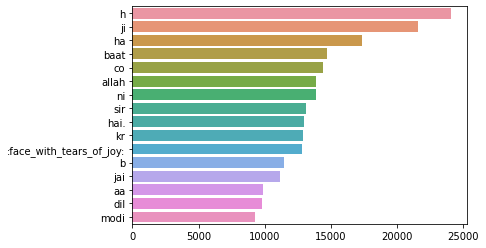

In [75]:
x, y= [], []


for word,count in most[:100]:
  if (word not in stop):
    x.append(word)
    y.append(count)
        
sns.barplot(x=y,y=x)

finding the top bi-grams in data

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus1, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus1)
    bag_of_words = vec.transform(corpus1)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

finding the top tri-grams in the data

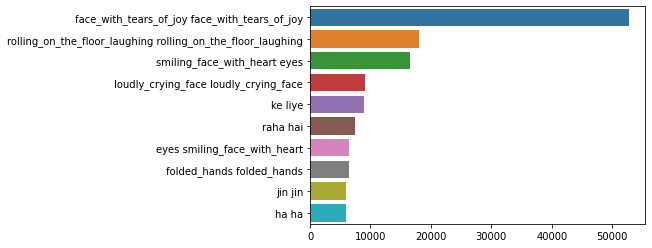

In [77]:
top_bi_grams=get_top_ngram(df['Text'],n=2)
x,y=map(list,zip(*top_bi_grams))
sns.barplot(x=y,y=x)

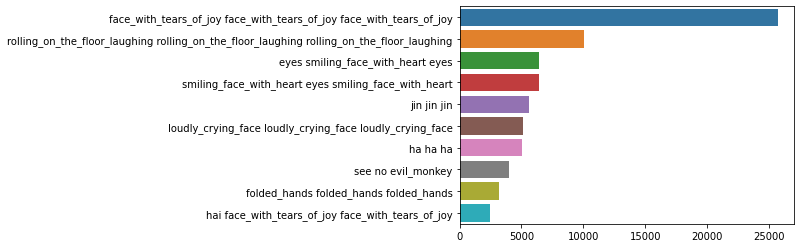

In [37]:
top_tri_grams=get_top_ngram(df['Text'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

topic modelling 
- tokenize 
- removing stopwords 
- lemmatize 
- bag of words 

In [38]:
df['Text'] = df['Text'].fillna('').apply(str)

In [39]:
#tokenize 
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def preprocess_data(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    #and re.match('^[a-zA-Z]+', w)
    for text in df['Text']:
      words=[w for w in word_tokenize(text) if (w not in stop)]
      words=[lem.lemmatize(w) for w in words if len(w)>2]
      corpus.append(words)
    return corpus

corpus=preprocess_data(df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [40]:
corpus

[['modi', 'mantrimandal', 'samil', 'honay', 'badhai', 'narmaday'],
 ['rashid', 'naamakool', 'mare'],
 ['caste',
  'religion',
  'nation',
  'talent',
  'trust',
  'problem',
  'paida',
  'ulte'],
 ['sir',
  'local',
  'police',
  'station',
  'complaint',
  'sunwai',
  'mene',
  '2019',
  'complaint',
  'karwai'],
 ['maahi',
  'song',
  'kesari',
  'current',
  'favourite',
  'music',
  'melody',
  'arijitsingh',
  'favouri'],
 ['boy', 'matter', 'uhh', 'love', 'lot'],
 ['sarwatjee',
  'wednesday',
  'muqabil',
  'opening',
  'speech',
  'behatreen',
  'lagee',
  'expression'],
 ['deodhar', 'today', 'speech', 'spoke', 'statesman', 'dedicated', 'victory'],
 ['aapke',
  'shubh',
  'chintakk',
  'lalit',
  'jaiswal',
  'taraf',
  'aapko',
  'aapki',
  'jeet',
  'hardik',
  'subhkamnaye'],
 ['pasand',
  'answer',
  'wish',
  'win',
  'pakvswi',
  'wivspak',
  'pakvswi',
  'pakvwi',
  'wivpak',
  'cwc2019',
  'icccricketworldcup2019'],
 ['pledgeagainstcorruption',
  'afternoon',
  'guru',
  

bag of words - gensim

In [182]:
!pip install -U gensim

Requirement already up-to-date: gensim in /usr/local/lib/python3.6/dist-packages (3.8.3)


In [184]:
import gensim

dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [189]:
#LDA Model 
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics = 4, id2word = dic, passes = 1, workers = 4)
lda_model.show_topics()

[(0,
  '0.015*"allah" + 0.012*"jai" + 0.009*"red_heart" + 0.009*":smiling_face_with_heart-eyes" + 0.008*"smiling_face_with_heart-eyes" + 0.008*":folded_hands" + 0.008*"folded_hands" + 0.007*"ram" + 0.007*":red_heart" + 0.006*":fire"'),
 (1,
  '0.023*":rolling_on_the_floor_laughing" + 0.011*"rolling_on_the_floor_laughing" + 0.006*"sir" + 0.005*"fan" + 0.004*"beaming_face_with_smiling_eyes" + 0.004*"asim" + 0.004*"sid" + 0.003*":beaming_face_with_smiling_eyes" + 0.003*"trend" + 0.003*"akshay"'),
 (2,
  '0.074*":face_with_tears_of_joy" + 0.057*"face_with_tears_of_joy" + 0.014*":loudly_crying_face" + 0.010*"loudly_crying_face" + 0.005*"love" + 0.005*"man" + 0.004*"aja" + 0.003*"relieved_face" + 0.003*"twitter" + 0.003*"tau"'),
 (3,
  '0.009*"baat" + 0.006*"dil" + 0.005*"modi" + 0.005*"khan" + 0.004*"pakistan" + 0.004*"desh" + 0.004*"din" + 0.004*"sir" + 0.004*"kia" + 0.004*"phir"')]

In [193]:
!pip install -U pyLDAvis
import pyLDAvis
from pyLDAvis import gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

Requirement already up-to-date: pyLDAvis in /usr/local/lib/python3.6/dist-packages (2.1.2)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.254606 -0.051497       1        1  37.236409
1      0.155148 -0.003179       2        1  22.590608
0     -0.251466 -0.238889       3        1  21.358908
2     -0.158289  0.293565       4        1  18.814076, topic_info=                                Term          Freq  ...  logprob  loglift
158          :face_with_tears_of_joy  59300.000000  ...  30.0000  30.0000
159           face_with_tears_of_joy  45687.000000  ...  29.0000  29.0000
406   :rolling_on_the_floor_laughing  22232.000000  ...  28.0000  28.0000
134                            allah  14070.000000  ...  27.0000  27.0000
1983             :loudly_crying_face  10837.000000  ...  26.0000  26.0000
...                              ...           ...  ...      ...      ...
226                            video   1797.140025  ...  -6.1017   1.1955
4819                             ada   1365.362463  ...  -6.3764   1.3670
1500                           tweet   1931.341915  ...  -6.0296   0.4828
276                           bharat   1622.798213  ...  -6.2037   0.7761
450                             yaar   1462.599277  ...  -6.3076   0.6125

[180 rows x 6 columns], token_table=      Topic      Freq                             Term
term                                                  
1348      2  0.999674  :beaming_face_with_smiling_eyes
6883      2  0.999720                  :clapping_hands
1513      3  0.999597             :face_blowing_a_kiss
158       4  0.999987          :face_with_tears_of_joy
1602      3  0.999913                            :fire
...     ...       ...                              ...
819       1  0.999716                             yaad
450       1  0.441428                             yaar
450       2  0.211458                             yaar
450       4  0.347210                             yaar
728       1  0.999854                          zindagi

[187 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3])

#Initial Analysis - on the data

1. Vocabulary Size - Number of unique words 


In [78]:
vocab_set = set(x for l in new for x in l)


In [79]:
vocab_set

{'pta:face_with_tears_of_joy::grinning_squinting_face::face_with_tears_of_joy:',
 'afaanfajjiin',
 'ranger',
 'chillao-donon',
 'bechara,,,',
 'fruits',
 'garu...em',
 'dduuurrrrr??????',
 'besharmo!',
 'yashu',
 'lowest',
 'dato',
 'aamaavaj',
 'sapatrishi',
 ':grinning_face_with_sweat::red_heart::folded_hands:',
 'maadaar',
 'n.',
 '우정z',
 'openparlyzw',
 'hogi:beaming_face_with_smiling_eyes::beaming_face_with_smiling_eyes::beaming_face_with_smiling_eyes:',
 '☻',
 'igu',
 'aata..yahi',
 ':face_with_tears_of_joy::face_with_tears_of_joy::winking_face_with_tongue::winking_face_with_tongue::face_with_tears_of_joy::face_with_tears_of_joy::face_with_tears_of_joy::winking_face_with_tongue::winking_face_with_tongue::face_with_tears_of_joy::face_with_tears_of_joy::face_with_tears_of_joy::face_with_tears_of_joy:',
 'hostar…',
 'sreemukhi:',
 'muhabbat.,,',
 'chuppperrrrrr',
 '(kachche',
 'asele',
 'nenaikaren',
 'prasna',
 'phone??????',
 'yuniversitti',
 'word!',
 'tholil',
 'raasto',
 'chatt

In [80]:
len(vocab_set)

470241

2. Top 100 words by frequency - removing the stopwords

In [82]:
# with stopwords 
counter1=Counter(corpus1)
most1=counter1.most_common()

In [84]:
most1

[('hai', 144016),
 ('mention', 105799),
 ('ki', 94379),
 ('ko', 78680),
 ('ke', 68799),
 ('to', 68275),
 ('ka', 65810),
 ('bhi', 60508),
 ('se', 60192),
 ('ho', 51202),
 ('nahi', 50651),
 ('me', 45134),
 ('hi', 43822),
 ('k', 42897),
 ('aur', 41370),
 ('ye', 41250),
 ('.', 35024),
 ('…', 34349),
 ('kya', 32608),
 ('na', 30826),
 ('kar', 28670),
 ('koi', 26297),
 ('is', 25387),
 ('retweet', 24951),
 ('h', 24088),
 ('jo', 23760),
 ('ne', 23596),
 ('hashtag', 23501),
 ('bhai', 23438),
 ('ya', 22555),
 ('ek', 22464),
 ('ji', 21565),
 ('hain', 21385),
 ('kuch', 21379),
 ('nhi', 21194),
 ('ab', 20910),
 ('tu', 20832),
 ('mein', 20591),
 ('toh', 19845),
 ('aap', 19365),
 (':', 19094),
 ('or', 19022),
 ('main', 17501),
 ('ha', 17309),
 ('t', 17051),
 ('he', 16951),
 ('tha', 16762),
 ('wo', 16507),
 ('in', 16124),
 ('a', 15805),
 ('the', 15717),
 ('raha', 15649),
 ('liye', 15625),
 ('_', 15542),
 ('tum', 15485),
 ('/', 15437),
 ('//', 14825),
 ('i', 14823),
 ('baat', 14700),
 ('mai', 14665),
 (

In [85]:
# without stopwords 
dic1=defaultdict(int)
for word in corpus1:
    if word not in stop:
        dic1[word]+=1

In [86]:
dic1 

defaultdict(int,
            {'modi': 9230,
             'mantrimandal': 11,
             'samil': 55,
             'honay': 288,
             'badhai': 1012,
             'narmaday': 4,
             'rashid': 186,
             'naamakool': 5,
             'mare': 341,
             'h': 24088,
             'u': 6732,
             'caste': 121,
             'religion': 202,
             'nation': 215,
             'talent': 257,
             'trust': 366,
             '!!': 2446,
             '..': 8224,
             'problem': 1179,
             'paida': 1044,
             'ulte': 41,
             'sir': 13121,
             'local': 175,
             'police': 1570,
             'station': 239,
             'complaint': 101,
             'bi': 1795,
             'sunwai': 36,
             'mene': 1313,
             '5': 2299,
             '2019': 1169,
             'karwai': 81,
             'maahi': 36,
             'song': 1814,
             'kesari': 134,
             'current': 76,

In [87]:
# top 100 frequent words 

c = Counter(dic1)
top_100 = c.most_common(100)

In [88]:
top_100

[('h', 24088),
 ('ji', 21565),
 ('ha', 17309),
 ('baat', 14700),
 ('co', 14412),
 ('allah', 13854),
 ('ni', 13833),
 ('sir', 13121),
 ('hai.', 12971),
 ('kr', 12871),
 (':face_with_tears_of_joy:', 12775),
 ('b', 11473),
 ('jai', 11130),
 ('aa', 9862),
 ('dil', 9773),
 ('modi', 9230),
 ('ga', 8504),
 ('..', 8224),
 ('din', 8163),
 (',', 8028),
 ('desh', 7581),
 ('phir', 7567),
 ('hai,', 7543),
 ('khan', 7274),
 ('e', 7274),
 ('sirf', 7166),
 ('pakistan', 6953),
 ('u', 6732),
 ('ram', 6569),
 ('kia', 6063),
 ('ma', 5982),
 ('love', 5923),
 ('naam', 5901),
 ('logo', 5876),
 (':face_with_tears_of_joy::face_with_tears_of_joy:', 5772),
 ('g', 5580),
 ('india', 5528),
 ('"', 5511),
 ('n', 5501),
 ('maa', 5441),
 ('kaam', 5366),
 ('tweet', 5227),
 ('pr', 5036),
 ('bat', 4902),
 ('2', 4897),
 ('hy', 4870),
 ('bjp', 4829),
 ('follow', 4758),
 ('"retweet', 4519),
 ('"mention', 4510),
 ('sy', 4349),
 ('gya', 4328),
 ('bharat', 4305),
 (':face_with_tears_of_joy::face_with_tears_of_joy::face_with_te

Plot of top 10 words in the data, excluding stopwords

<BarContainer object of 10 artists>

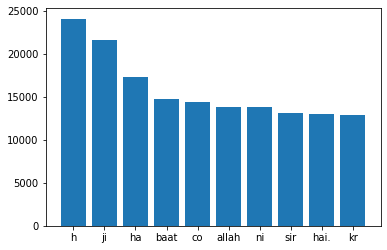

In [89]:
top=sorted(dic1.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 500 artists>

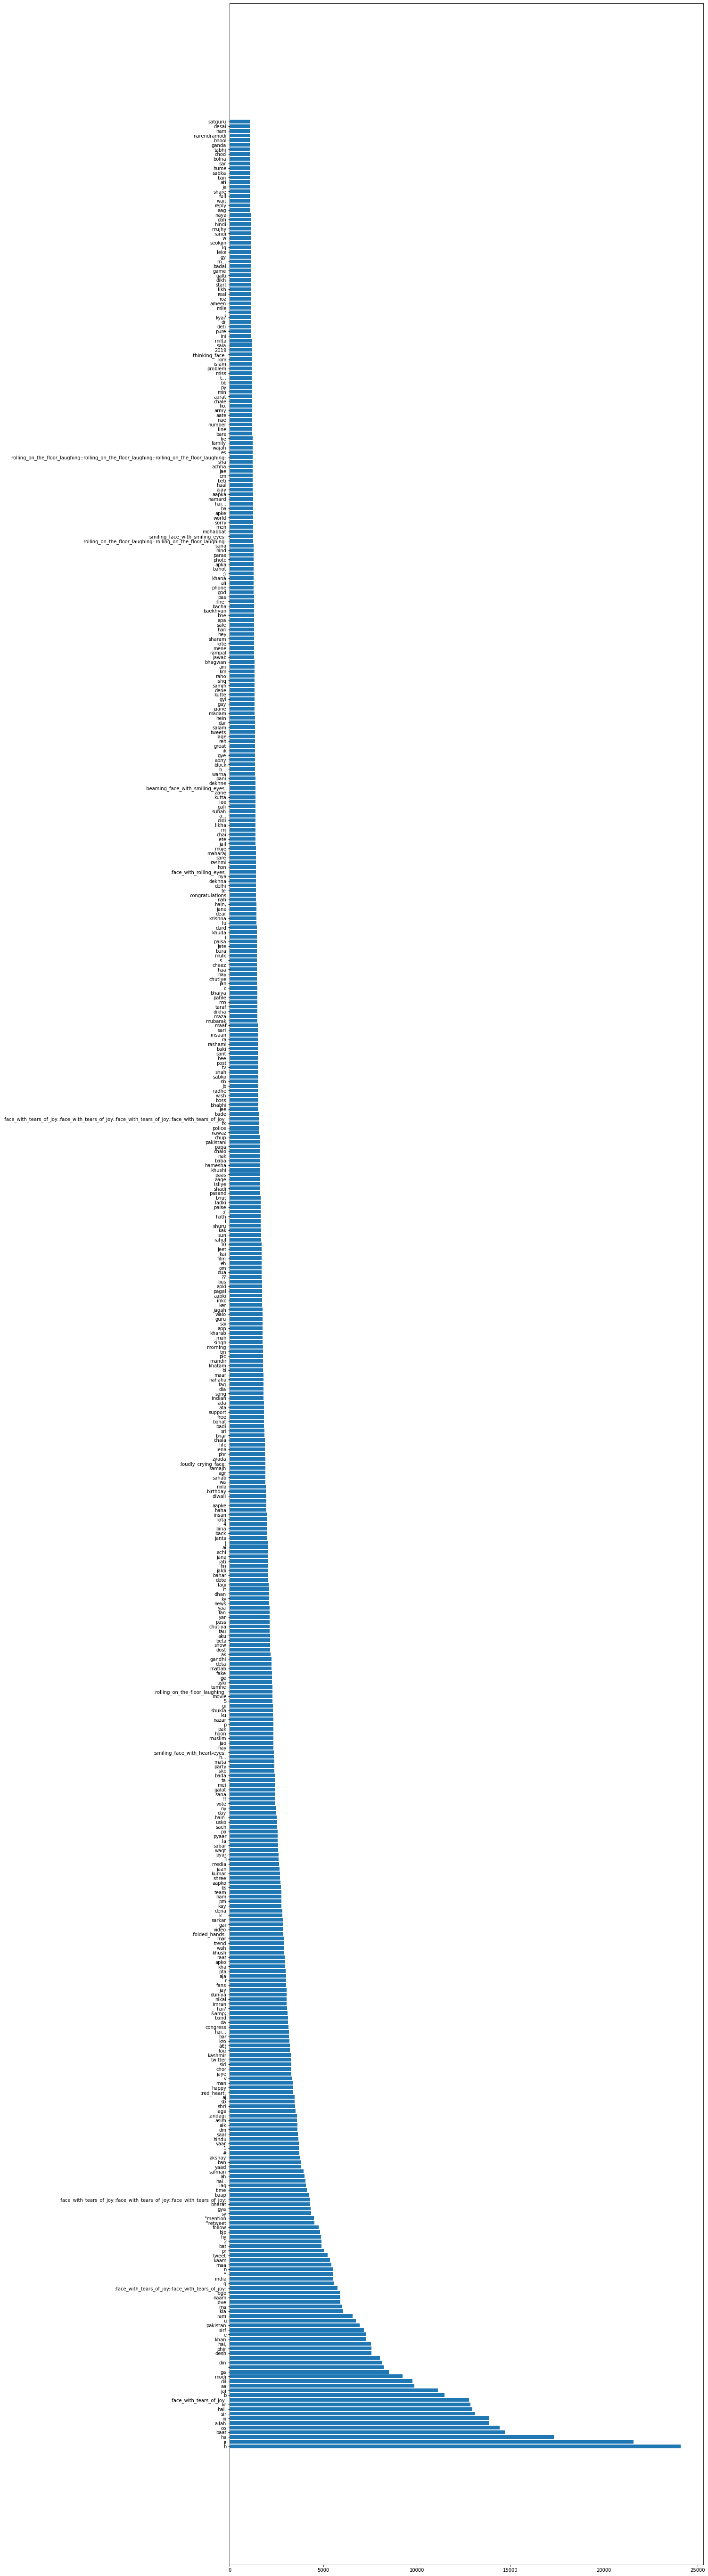

In [107]:
top=sorted(dic1.items(), key=lambda x:x[1],reverse=True)[:500]
x,y=zip(*top)
#plt.subplots(figsize=(18,10))
plt.figure(figsize=(18,100))
#plt.yticks(rotation=-45)
plt.barh(x,y)
